# Clustering

**If you are a Colab user**

If you use Google Colab, you can uncomment the following cell to mount your Google Drive to Colab.
After that, Clab can read/write files and data in your Google Drive

please change the current directory to be the folder that you save your Notebook and
data folder. For example, I save my Colab files and data in the following location

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

#%cd /content/drive/MyDrive/Colab\ Notebooks

**Set up standards for the remainder of the notebook**

In [2]:
# import libraries and modules to be used
import numpy as np 
np.random.seed(12345)
np.set_printoptions(precision=4, suppress=True)

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(8, 6))

import seaborn as sns

import scipy as sp # we use the linkage and dendrogram from scipy.cluster.hierarchy

import sklearn # we use agglomerative clustering, k-mean, and Gaussian Mixture from 


# to display multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## The Five-instance Example

In [3]:
# define the dataset with five instances characterized by two features
X1 = np.array([[1,2], [1,2.5], [3,1], [4,0.5], [4,2]])

# labels for data points
labelList = list(range(1,6))

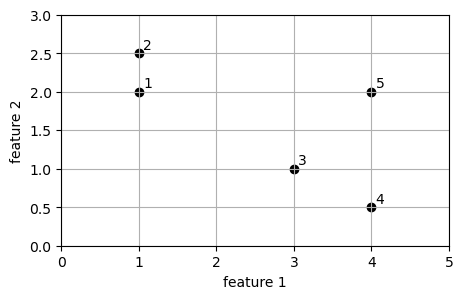

In [4]:
#visualize the data
plt.figure(figsize=(5, 3))

plt.scatter(X1[:,0], X1[:,1], c='k')

# Create numbered labels for each point
for i in range(X1.shape[0]):
    plt.annotate(str(i+1), 
                 xy=(X1[i,0], X1[i,1]), 
                 xytext=(3, 3), 
                 textcoords='offset points')

plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0,5]), plt.ylim([0,3])
plt.grid()

plt.show();

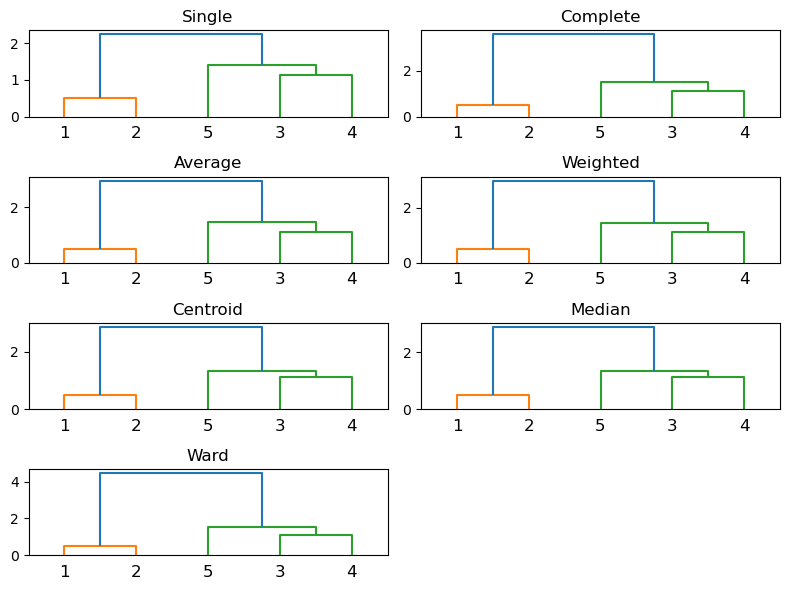

In [5]:
# use dendrogram to represent the clustering process
from scipy.cluster.hierarchy import linkage, dendrogram

methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']


fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(8, 6))


axes = axes.flatten()
for i, method in enumerate(methods):
    # Perform hierarchical/agglomerative clustering
    Z = linkage(X1, 
                method=method, 
                metric='euclidean')
    # Plot the hierarchical clustering as a dendrogram.
    dendrogram(Z, 
               labels=labelList, 
               ax=axes[i])
    axes[i].set_title(method.capitalize())

# Hide the unused subplot
if len(axes) > len(methods):
    axes[-1].axis('off')

plt.tight_layout()
plt.show();

# all the methods seem to put 1 and 2 in one cluster, and 3, 4, 5 in another cluster.

## Protein Sources

protein.csv contains information for nine different protein sources and their respective consumption from various countries.

We can use the nine protein sources (columns 1 to 9) as attributes to cluster data points

In [6]:
# import data
df = pd.read_csv('Data/protein.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     25 non-null     object 
 1    RedMeat    25 non-null     float64
 2    WhiteMeat  25 non-null     float64
 3    Eggs       25 non-null     float64
 4    Milk       25 non-null     float64
 5    Fish       25 non-null     float64
 6    Cereals    25 non-null     float64
 7    Starch     25 non-null     float64
 8    Nuts       25 non-null     float64
 9    Fr&Veg     25 non-null     float64
dtypes: float64(9), object(1)
memory usage: 2.1+ KB


In [7]:
# dataset with 9 attributes
X2= df.iloc[:,1:]
X2.head()

# Label for each data point
labelList = list(df.Country)

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


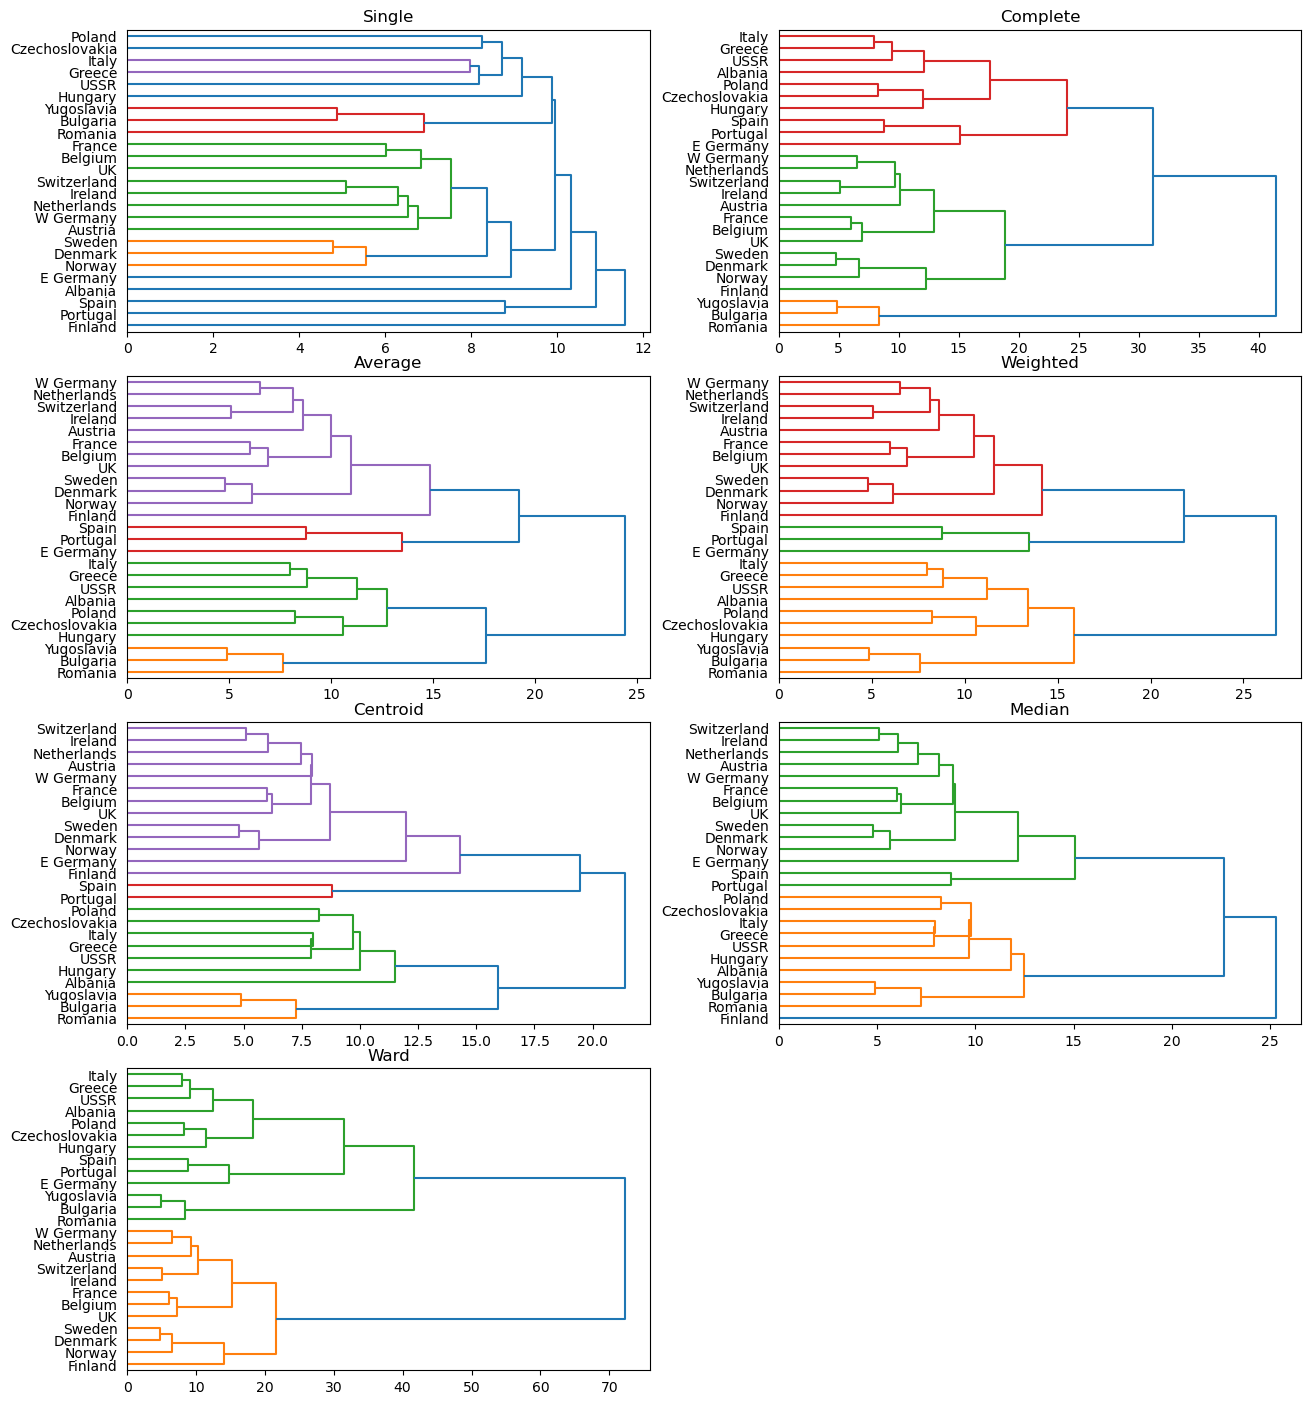

In [8]:
# use dendrogram to represent the agglomerative clustering process
from scipy.cluster.hierarchy import linkage, dendrogram

methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(6, 14))
fig.tight_layout()
plt.subplots_adjust(left=-1)

# Flatten axes (since we have 4x2 grid but only 7 methods)
axes = axes.flatten()

for i, method in enumerate(methods):
    Z = linkage(X2, 
                method=method, 
                metric='euclidean'
               )
    
    dendrogram(
        Z,
        labels=labelList,
        orientation='right',
        #distance_sort='descending',
        ax=axes[i]
    )
    axes[i].set_title(method.capitalize())

# Hide the unused subplot
if len(axes) > len(methods):
    axes[-1].axis('off')

plt.show();

<Figure size 800x600 with 0 Axes>

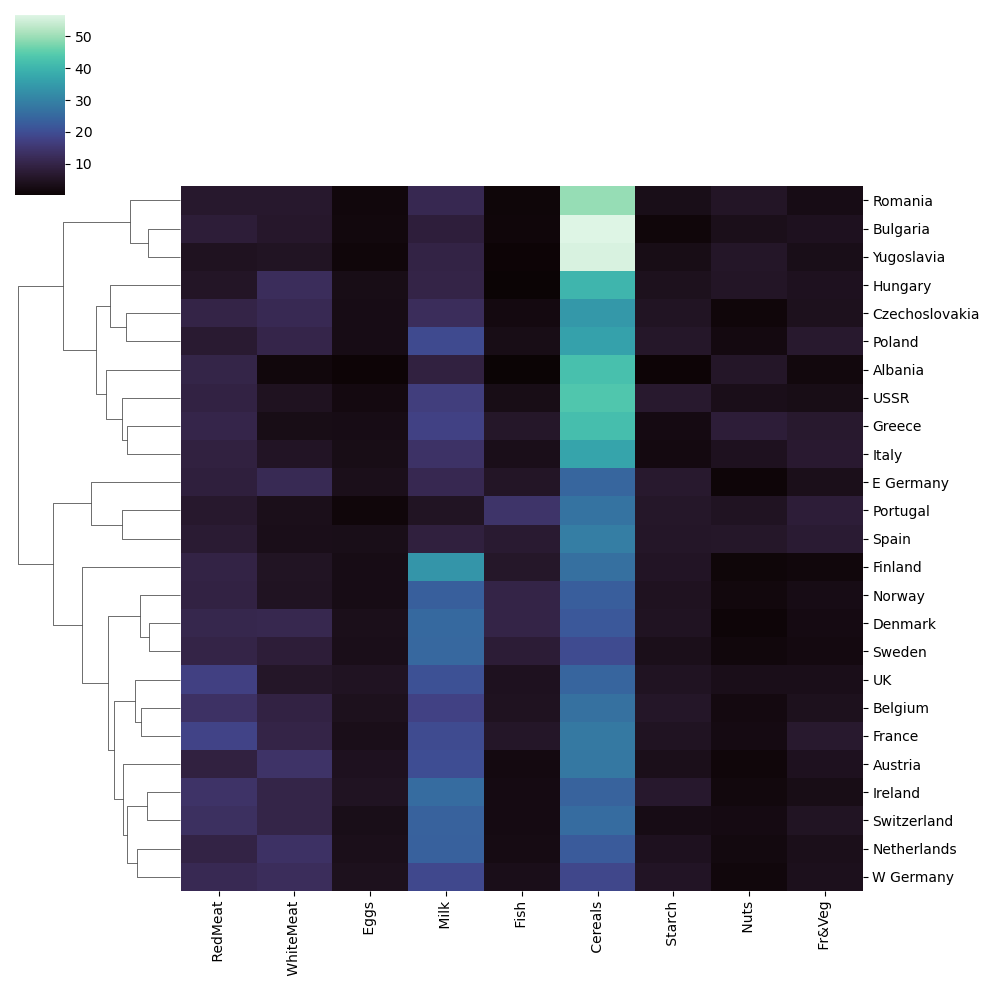

In [9]:
# try the clustermap function in seaborn
plt.figure(figsize=(8,6))
labelList = list(df['Country'])
sns.clustermap(X2, 
               col_cluster=False,
               method='average', 
               metric='euclidean',
               cmap='mako',
               yticklabels=labelList
              )
plt.show();

## Dendrogram Sklearn

In [10]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # provided by Sklearn 
    # https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    return linkage_matrix

## Metrics for Evaluation of Clustering

In [11]:
# If groundtruth is available, we can evaluate the performance of classification for clustering algorithms
def evaluate_clustering(X, y_true, y_pred):
    from sklearn import metrics
    """
    Evaluate clustering performance using multiple metrics.

    Parameters:
    -----------
    model: clustering model
    X : array-like, shape (n_samples, n_features)
        Feature matrix (only for silhouette score calculation).
    y_true : array-like, shape (n_samples,)
        Ground truth labels.
    y_pred : array-like, shape (n_samples,)
        Predicted cluster labels.

    Returns:
    --------
    None
    Prints clustering metrics.
    """
    
    results = {
        "Homogeneity": metrics.homogeneity_score(y_true, y_pred),
        "Completeness": metrics.completeness_score(y_true, y_pred),
        "V-measure": metrics.v_measure_score(y_true, y_pred, beta=1),
        "Rand": metrics.rand_score(y_true, y_pred),
        "Adjusted Rand": metrics.adjusted_rand_score(y_true, y_pred),
        "Normalized MI": metrics.normalized_mutual_info_score(y_true, y_pred),
        "Adjusted MI": metrics.adjusted_mutual_info_score(y_true, y_pred),
        "Silhouette": metrics.silhouette_score(X, y_pred, metric="euclidean", random_state=0)
    }

    df = pd.DataFrame(results.items(), columns=["Metric", "Score"])
    print(df.to_string(index=False, justify="left", formatters={"Score": "{:.3f}".format}))


## Recognition of Writing Digits

If we have the groundtruth, we can assess the clustering performance

### Data preprocessing

In [12]:
# load data
from sklearn import datasets

# Load Digits dataset and take a look at the data description
digits = datasets.load_digits() #load data
print(digits.DESCR)
digits.keys()

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [13]:
(n_samples, n_features), n_digits = digits.data.shape, np.unique(digits.target).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64


In [14]:
df = pd.DataFrame(digits['data'],columns=digits['feature_names'])
df.head()


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


### Feature Extraction

In [15]:
from sklearn.decomposition import PCA
No_PC = 64 # define the number of principal components. Here we use No_PC = the total number of attributes in order to observe the contribution of every principal component. Feel free to choose smaller numbers
pca = PCA() # define PCA analysis # n_components using PCA(the number of pinrcipal components)

df_pca =pca.fit_transform(df) # apply dimensional reduction to the normalized data to obtain principal components

In [16]:
# Individual and cumulative explained variance ratios
var_ratio = pca.explained_variance_ratio_
var_ratio_cum = np.cumsum(var_ratio)

pca_var = pd.DataFrame({
    'Explained Variance Ratio': var_ratio.round(3),
    'Cumulative Variance Ratio': var_ratio_cum.round(3)
}, index=[f'C{i+1}' for i in range(len(var_ratio))])

pca_var.head(30)

# 28 principal components explain 95% of data variation. In this example, we use the top 28 principal components as the attributes for clustering

,Explained Variance Ratio,Cumulative Variance Ratio
C1,0.149,0.149
C2,0.136,0.285
C3,0.118,0.403
C4,0.084,0.487
C5,0.058,0.545
C6,0.049,0.594
C7,0.043,0.637
C8,0.037,0.674
C9,0.034,0.707
C10,0.031,0.738


In [17]:
# Select the top 28 principal componentes as features for clustering 
X3=df_pca[:,0:28]

y_true=digits['target'] # true label

### Agglomerative Clustering

#### use scipy

Metric        Score
  Homogeneity 0.836
 Completeness 0.862
    V-measure 0.849
         Rand 0.956
Adjusted Rand 0.765
Normalized MI 0.849
  Adjusted MI 0.848
   Silhouette 0.189


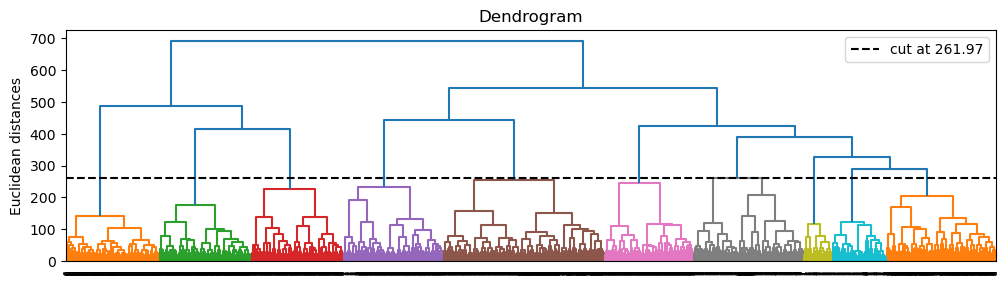

In [18]:
# We can use linkage, dendrogram, fcluster provided by scipy.cluster.hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster 
from sklearn import metrics

# linkages
Z = linkage(X3,
            method='ward', 
            metric='euclidean'
           )

# Cut the dendrogram to form flat clusters
y_pred = fcluster(Z, # linkages
                  t=10, # number of clusters
                  criterion='maxclust'
                 )


# evaluation clustering performance
evaluate_clustering(X3, y_true, y_pred)

# show dendrogram
fig, ax = plt.subplots(figsize=(12, 3))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')

# define color_threshold for dendrogram if we know the number of clusters
sorted_distances = sorted(Z[:, 2], reverse=True) # Z[:,2] saves the heights
color_threshold = sorted_distances[n_digits-1]+1  # 10 clusters -> cut at 10th largest distance
color_threshold

dendrogram(
    Z,
    labels=y_true,
    color_threshold = color_threshold,
    distance_sort=True,
    count_sort = True,
    ax=ax
)


# Cutting the dendrogram to have 10 clusters
plt.axhline(y=color_threshold, 
            color='k', 
            linestyle='--', 
            label=f'cut at {color_threshold:.2f}')
plt.legend()

plt.show();

#### use sklean

Metric        Score
  Homogeneity 0.836
 Completeness 0.862
    V-measure 0.849
         Rand 0.956
Adjusted Rand 0.765
Normalized MI 0.849
  Adjusted MI 0.848
   Silhouette 0.189


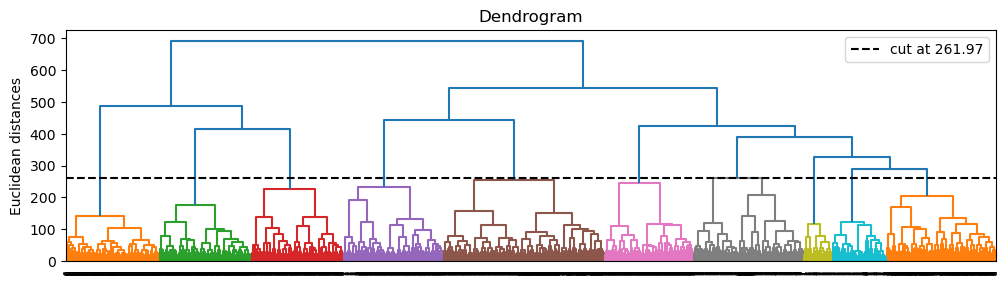

In [19]:
# Clustering analysis
from sklearn.cluster import AgglomerativeClustering

# Agglomerative Clustering
Cluster= AgglomerativeClustering(n_clusters=n_digits, 
                                 metric='euclidean', 
                                 linkage='ward',
                                 compute_distances=True
                                ).fit(X3) # metric is for calculating linkages, linkage is the linkage criterion to use for clustering

# linkages
linkage_matrix = plot_dendrogram(Cluster)

# Evaluation
evaluate_clustering(X3, y_true, y_pred)

# draw dendrogram
fig, ax = plt.subplots(figsize=(12, 3))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')


dendrogram(
    linkage_matrix,
    labels=y_true,
    color_threshold = color_threshold,
    distance_sort=True,
    count_sort = True,
    ax=ax
)

# Cutting the dendrogram to have 10 clusters
plt.axhline(y=color_threshold, 
            color='k', 
            linestyle='--', 
            label=f'cut at {color_threshold:.2f}')
plt.legend()

plt.show();

### K-mean

#### K-mean implementation (assume K=10)

In [20]:
from sklearn.cluster import KMeans

# fit a k-mean model
kmeans = KMeans(init='k-means++', 
                n_clusters=n_digits, 
                random_state=0
               )
kmeans.fit(X3)

# predict class labels
y_pred = kmeans.predict(X3)

# evaluate the k-mean model performance
evaluate_clustering(X3, y_true, y_pred)


KMeans(n_clusters=10, random_state=0)

Metric        Score
  Homogeneity 0.714
 Completeness 0.741
    V-measure 0.727
         Rand 0.924
Adjusted Rand 0.608
Normalized MI 0.727
  Adjusted MI 0.724
   Silhouette 0.175


#### Optimization of K based on inertia

K = 2, Inertia = 1830532.49, Silhouette score =0.10931
K = 3, Inertia = 1622218.27, Silhouette score =0.13395
K = 4, Inertia = 1508780.67, Silhouette score =0.13502
K = 5, Inertia = 1393591.60, Silhouette score =0.14537
K = 6, Inertia = 1310244.65, Silhouette score =0.15743
K = 7, Inertia = 1239300.36, Silhouette score =0.16780
K = 8, Inertia = 1210532.17, Silhouette score =0.15853
K = 9, Inertia = 1141358.21, Silhouette score =0.17400
K = 10, Inertia = 1104980.10, Silhouette score =0.17489
K = 11, Inertia = 1095337.44, Silhouette score =0.14773
K = 12, Inertia = 1055226.13, Silhouette score =0.14990
K = 13, Inertia = 999544.63, Silhouette score =0.15962
K = 14, Inertia = 966520.62, Silhouette score =0.15993

Best number of clusters (highest Silhouette score): 10 (Silhouette score = 0.17)


<Figure size 600x400 with 0 Axes>

Text(0.5, 1.0, 'K-means: Inertia vs Number of Clusters')

Text(0.5, 0, 'Number of Clusters (K)')

Text(0, 0.5, 'Inertia')

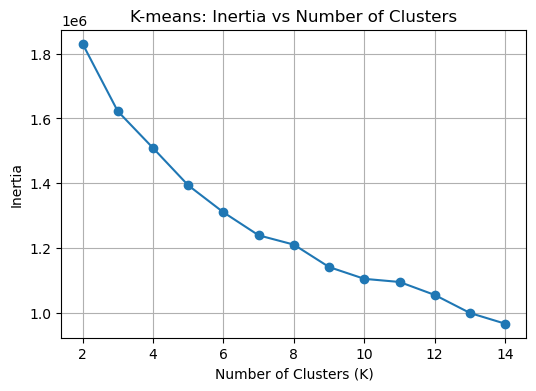

<Figure size 600x400 with 0 Axes>

Text(0.5, 1.0, 'Silhouette Score vs Number of Clusters')

Text(0.5, 0, 'Number of Clusters (K)')

Text(0, 0.5, 'Silhouette Score')

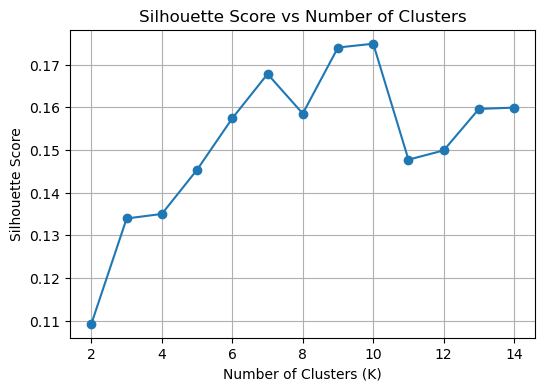

Metric        Score
  Homogeneity 0.714
 Completeness 0.741
    V-measure 0.727
         Rand 0.924
Adjusted Rand 0.608
Normalized MI 0.727
  Adjusted MI 0.724
   Silhouette 0.175


In [21]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

range_K = range(2, 15) # a range of K
inertia_values = []
silhouette_scores = [] 

lowest_inertia = np.inf
highest_silhouette_score = -1 # initialize silhouette score 
optimized_K = None 
optimized_km = None
optimized_labels = None

# calculate inertia and silhouette score for each K 
for k in range_K:
    km = KMeans(init='k-means++', n_clusters=k, random_state=0)
    labels = km.fit_predict(X3)
    inertia = km.inertia_
    inertia_values.append(inertia)
    score = silhouette_score(X3, labels)
    silhouette_scores.append(score)
    
    print(f"K = {k}, Inertia = {inertia:.2f}, Silhouette score ={score:.5f}")
    
    if score > highest_silhouette_score: # upate the model
        highest_silhouette_score = score
        optimized_K = k
        optimized_km = km
        optimized_labels = labels

print(f"\nBest number of clusters (highest Silhouette score): {optimized_K} (Silhouette score = {highest_silhouette_score:.2f})")


# Plot inertia vs number of clusters
plt.figure(figsize=(6,4))
plt.plot(range_K, inertia_values, marker='o')
plt.title('K-means: Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show();

# Plot Silhouette score vs number of clusters
plt.figure(figsize=(6,4))
plt.plot(range_K, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show();

# --------------------------
# Evaluate best clustering
# --------------------------
evaluate_clustering(X3, y_true, optimized_labels)

### Gaussian Mixture Model

#### GMM implementation (assume K=10)

In [22]:
from sklearn.mixture import GaussianMixture

# fit a Gaussian Mixture model
gm = GaussianMixture(n_components=n_digits, 
                     init_params = 'k-means++', #‘kmeans’, ‘k-means++’, ‘random’, ‘random_from_data’
                     random_state=0
                    ).fit(X3)

# predict class labels
y_pred = gm.predict(X3)

# evaluate the Gaussian Mixture model performance
evaluate_clustering(X3, y_true, y_pred)

Metric        Score
  Homogeneity 0.799
 Completeness 0.816
    V-measure 0.807
         Rand 0.949
Adjusted Rand 0.727
Normalized MI 0.807
  Adjusted MI 0.806
   Silhouette 0.166


#### Optimization of K

K = 2, Silhouette Score = 0.099
K = 3, Silhouette Score = 0.095
K = 4, Silhouette Score = 0.116
K = 5, Silhouette Score = 0.129
K = 6, Silhouette Score = 0.140
K = 7, Silhouette Score = 0.153
K = 8, Silhouette Score = 0.116
K = 9, Silhouette Score = 0.148
K = 10, Silhouette Score = 0.166
K = 11, Silhouette Score = 0.149
K = 12, Silhouette Score = 0.144
K = 13, Silhouette Score = 0.147

The best number of clusters: 10 (Silhouette Score = 0.166)


<Figure size 600x400 with 0 Axes>

Text(0.5, 1.0, 'Silhouette Score vs Number of Clusters')

Text(0.5, 0, 'Number of Clusters (K)')

Text(0, 0.5, 'Silhouette Score')

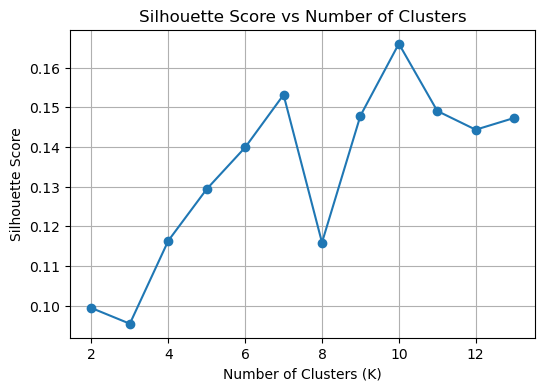

Metric        Score
  Homogeneity 0.799
 Completeness 0.816
    V-measure 0.807
         Rand 0.949
Adjusted Rand 0.727
Normalized MI 0.807
  Adjusted MI 0.806
   Silhouette 0.166


In [23]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

range_K = range(2, 14)  # a range of K
highest_silhouette_score = -1 # initialize silhouette score 
optimized_K = None
opitmized_GMM = None
optimized_labels = None
silhouette_scores = [] 

# Calculate Silhouette score for a range of K:
for k in range_K:
    gm = GaussianMixture(
        n_components=k,
        init_params='k-means++',  
        random_state=0
    ).fit(X3)
    
    labels = gm.predict(X3)
    score = silhouette_score(X3, labels)
    silhouette_scores.append(score) 
    print(f'K = {k}, Silhouette Score = {score:.3f}')
    
    if score > highest_silhouette_score: # upate the model
        highest_silhouette_score = score
        optimized_K = k
        optimized_GMM = gm
        optimized_labels = labels

print(f"\nThe best number of clusters: {optimized_K} (Silhouette Score = {highest_silhouette_score:.3f})")


# Plot Silhouette scores
plt.figure(figsize=(6,4))
plt.plot(range_K, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show();

# --------------------------
# Evaluate the best clustering
# --------------------------
evaluate_clustering(X3, y_true, optimized_labels)